# Introduction

### The World Cups dataset show all information about all the World Cups in the history from 1930 to 2014, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups.


# Importation of Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# installation of plotly and cufflinks


In [2]:
!pip install plotly
!pip install cufflinks

## importation of the libraries

In [3]:
import plotly as py
import plotly.io as pio
pio.renderers.default = 'notebook'
import cufflinks as cf

In [4]:
from plotly.offline import iplot

In [5]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

# importation of Datasets

In [12]:
world_cups = pd.read_csv('WorldCups.csv')
players = pd.read_csv('WorldCupPlayers.csv')
matches = pd.read_csv('WorldCupMatches.csv')

## overview of the datasets

In [13]:
world_cups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [14]:
world_cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [15]:
world_cups.shape

(20, 10)

In [16]:
world_cups.head()


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [17]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [18]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [19]:
players.shape

(37784, 9)

In [20]:
players.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


In [21]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [22]:
matches.shape

(4572, 20)

In [23]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [24]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning

## removing the null values

In [25]:
matches.dropna(inplace = True)

In [26]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


## checking for countries names

In [27]:
matches['Home Team Name'].value_counts()
world_cups['Winner'].value_counts()

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64

In [28]:
for index,wr in enumerate('Germany FR'):
    matches=matches.replace('Germany FR', 'Germany')

In [29]:
name = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
name

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [30]:
name.index

Index(['rn">Republic of Ireland', 'rn">United Arab Emirates',
       'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro',
       'rn">Bosnia and Herzegovina'],
      dtype='object')

In [31]:
wrong_list = list(name.index)
wrong_list

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [32]:
correct_list = [name.split('>')[1]for name in wrong_list]
correct_list

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [33]:
world_cups['Attendance'] =world_cups['Attendance'].str.replace(".", "")

In [34]:
world_cups['Year'] =pd. to_datetime(world_cups['Year'], format = '%Y')
world_cups['Year'] =world_cups['Year'].dt.strftime('%Y')

matches['Year'] =pd. to_datetime(matches['Year'], format = '%Y')
matches['Year'] =matches['Year'].dt.strftime('%Y')



world_cups['Attendance'] =world_cups['Attendance'].astype('int')


In [35]:
for index,wr in enumerate('Germany FR'):
    world_cups=world_cups.replace('Germany FR', 'Germany')

In [36]:
for index,wr in enumerate(wrong_list):
    world_cups=world_cups.replace(wrong_list[index], correct_list[index])
for index,wr in enumerate(wrong_list):
    matches=matches.replace(wrong_list[index], correct_list[index])
for index,wr in enumerate(wrong_list):
    players=players.replace(wrong_list[index], correct_list[index])

# Most Number of World cup Winning Title

In [37]:
winner = world_cups['Winner'].value_counts()
winner

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [38]:
runnerup = world_cups['Runners-Up'].value_counts()
runnerup

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [39]:
third = world_cups['Third'].value_counts()
third

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [40]:
teams = pd.concat([winner,runnerup,third], axis =1)
teams.fillna(0, inplace =True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [42]:
teams.iplot(kind ='bar', xTitle ='Teams',yTitle ='count', title = 'FIFA World cup winning count')


# Number of Goal per Country

In [43]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [44]:
home = matches[['Home Team Name','Home Team Goals']].dropna()
away = matches[['Away Team Name','Away Team Goals']].dropna()

In [45]:
home.columns =['Countries','Goals']
away.columns = home.columns

In [46]:
goals= home.append(away,ignore_index=True)
goals= goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,12.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [47]:
goals = goals.sort_values(by ='Goals',ascending =False)
goals =goals[:20]
goals


,Goals
Countries,
Germany,231.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
Spain,92.0
Netherlands,91.0
Hungary,87.0
Uruguay,80.0


In [48]:
goals.iplot(kind = 'bar',xTitle ='Countries Names',yTitle ='Goals', title = 'Countries with the most number of goals') 


# Attendance,Number of Teams,Goals, and Matches per cup

In [49]:
world_cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     object
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int32 
dtypes: int32(1), int64(3), object(6)
memory usage: 1.6+ KB


In [50]:
world_cups.head(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549


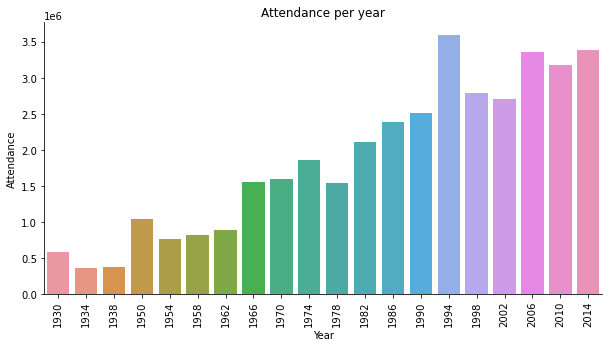

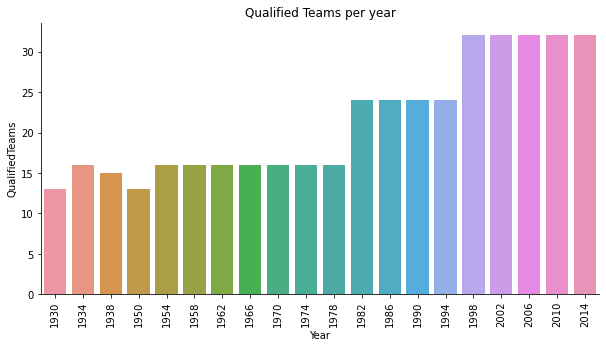

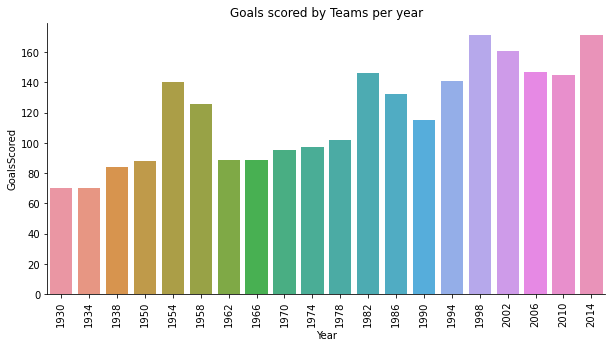

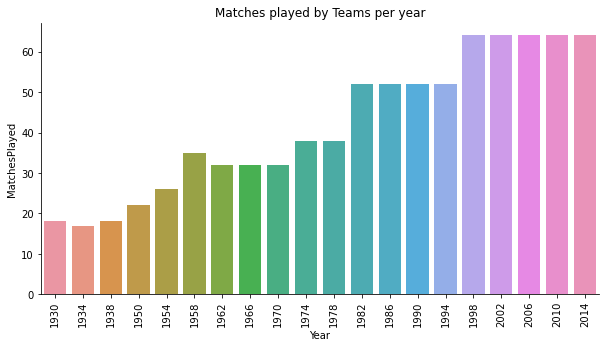

In [51]:
fig, ax =plt.subplots(figsize =(10, 5))
sns.despine(right =True)
                      
g =sns.barplot(x ='Year', y ='Attendance', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title('Attendance per year')


#===============================
fig, ax =plt.subplots(figsize =(10, 5))
sns.despine(right =True)
                      
g =sns.barplot(x ='Year', y ='QualifiedTeams', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title('Qualified Teams per year')


#===============================
fig, ax =plt.subplots(figsize =(10, 5))
sns.despine(right =True)
                      
g =sns.barplot(x ='Year', y ='GoalsScored', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title('Goals scored by Teams per year')

#==========================
fig, ax =plt.subplots(figsize =(10, 5))
sns.despine(right =True)
                      
g =sns.barplot(x ='Year', y ='MatchesPlayed', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title('Matches played by Teams per year')





plt.show()

# Goals Per Team Per World cup

In [52]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [53]:
home = matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()
home

Year  Home Team Name
1930  Argentina         16.0
      Brazil             4.0
      Chile              4.0
      France             4.0
      Paraguay           1.0
                        ... 
2014  Russia             1.0
      Spain              1.0
      Switzerland        4.0
      USA                2.0
      Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [54]:
away = matches.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()
away

Year  Away Team Name
1930  Argentina         2.0
      Belgium           0.0
      Bolivia           0.0
      Brazil            1.0
      Chile             1.0
                       ... 
2014  Russia            1.0
      Spain             3.0
      Switzerland       3.0
      USA               4.0
      Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [55]:
goals = pd.concat([home,away], axis = 1)
goals.fillna(0,inplace = True)
goals['Goals'] =goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels =['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
Year                 
1930 Argentina   18.0
     Brazil       5.0
     Chile        5.0
     France       4.0
     Paraguay     1.0
...               ...
1998 Iran         2.0
     Mexico       8.0
     Norway       5.0
     Tunisia      1.0
2006 IR Iran      0.0

[427 rows x 1 columns]

In [56]:
goals = goals.reset_index()
goals



,Year,level_1,Goals
0,1930,Argentina,18.0
1,1930,Brazil,5.0
2,1930,Chile,5.0
3,1930,France,4.0
4,1930,Paraguay,1.0
...,...,...,...
422,1998,Iran,2.0
423,1998,Mexico,8.0
424,1998,Norway,5.0
425,1998,Tunisia,1.0


In [57]:
goals.columns =['Year','Country','goals']

In [58]:
goals=goals.sort_values(by =['Year','goals'], ascending =[True,False])
goals

,Year,Country,goals
0,1930,Argentina,18.0
7,1930,Uruguay,15.0
6,1930,USA,7.0
8,1930,Yugoslavia,7.0
1,1930,Brazil,5.0
...,...,...,...
355,2014,Japan,2.0
361,2014,Russia,2.0
340,2014,Cameroon,1.0
352,2014,Honduras,1.0


In [59]:
top5 =goals.groupby('Year').head(5)
top5


,Year,Country,goals
0,1930,Argentina,18.0
7,1930,Uruguay,15.0
6,1930,USA,7.0
8,1930,Yugoslavia,7.0
1,1930,Brazil,5.0
...,...,...,...
349,2014,Germany,25.0
358,2014,Netherlands,20.0
339,2014,Brazil,15.0
342,2014,Colombia,15.0


In [65]:
 import plotly.graph_objects as go





In [66]:
x,y = goals['Year'].values,goals['goals'].values

In [69]:
data =[]

for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['goals']
    
    
    data.append(go.Bar(x= year,y =goal,name =team))
layout = go.Layout(barmode = 'stack', title ='Top 5 team with most Goals')


fig = go.Figure(data = data,layout = layout)
fig.show()

 # Matches with the highest Attendance

In [70]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [71]:
matches['Datetime']= pd.to_datetime(matches['Datetime'])

In [72]:
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %Y') )

In [73]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930,"13 Jul, 1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930,"14 Jul, 1930",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930,"14 Jul, 1930",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930,"15 Jul, 1930",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


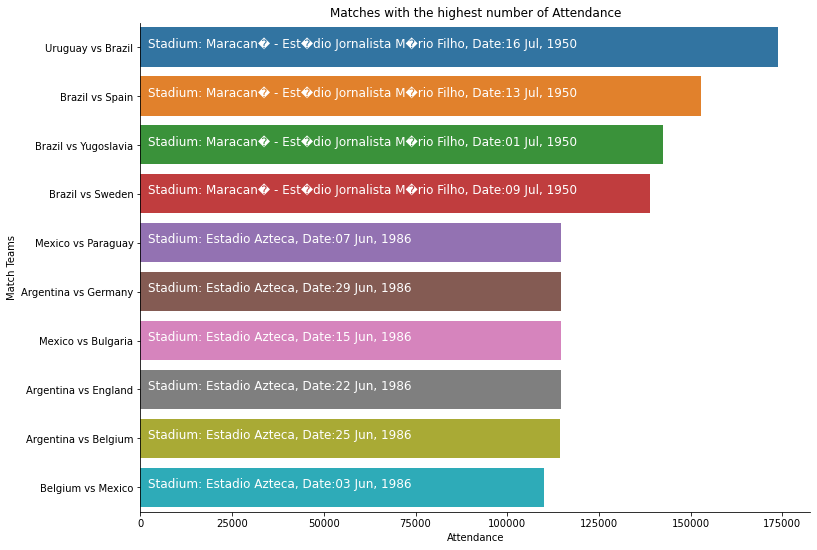

In [74]:
top10 = matches.sort_values(by ='Attendance',ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs "+ top10['Away Team Name']

plt.figure(figsize =(12,9))
ax = sns.barplot(y =top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title('Matches with the highest number of Attendance')

for i,s in enumerate("Stadium: " + top10['Stadium'] + ", Date:"+ top10['Datetime']):
                                         ax.text(2000,i,s, fontsize =12,color ='white')
                                         

plt.show()



 # Match outcomes by home and away teams

In [75]:
def get_labels(matches):
    if matches['Home Team Goals']> matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals']< matches['Away Team Goals']:
        return 'Away Team Win'
    return 'Draw'

In [76]:
matches['outcomes']=matches.apply(lambda x: get_labels(x), axis = 1)

In [77]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcomes
0,1930,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930,"13 Jul, 1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930,"14 Jul, 1930",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930,"14 Jul, 1930",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930,"15 Jul, 1930",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [78]:
plt.figure(figsize =(6,6))
mt = matches['outcomes'].value_counts()
mt

Home Team Win    486
Draw             190
Away Team Win    174
Name: outcomes, dtype: int64

<Figure size 432x432 with 0 Axes>

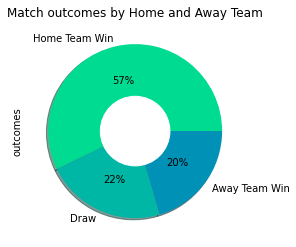

In [79]:
mt.plot.pie(autopct ="%1.0f%%", colors =sns.color_palette('winter_r'), shadow = True)

c= plt.Circle((0, 0), 0.4, color ='white')
plt.gca().add_artist(c)
plt.title('Match outcomes by Home and Away Team')
plt.show()

# Conclusion

## The 5 top winning countries from(1930-2014) includes Brazil,Italy,Germany,Uruguay and Argentina.
--------------------------------------------------------
## Countries with the highest goals includes Germany,Brazil and Argentina
------------------------------------------------------
## The highest overall yearly attendance was recorded in 1994
---------------------------------------------
## More Team qualified for World cup from 1998-2014
----------------------------------------------
## The most goals were scored in 2014
---------------------------------------------------
## More matches were played from 1998-2014(since more teams qualified too)
-----------------------------------
## Uruguay vs Brazil recorded the highest match attendance on 16th July,1950
---------------------------------------
## The rate at which team win at home matches is greater than the rate they win at away matches
​